**Carga de Librerias**

Cargamos la librerias que vamos a utilizar para el trabajo de los datos.

In [89]:
# Herramientas para trabajar Data

import pandas as pd
import numpy as np

# Herramientas de Visualizacion

import matplotlib.pyplot as plt
import seaborn as sns

**Carga de DataSets**

Procedemos a cargar los distintos DataSets y crear los DataFrames con los cuales trabajaremos los datos

In [90]:
canal = pd.read_excel('.\Datasets\CanalDeVenta.xlsx')
canal.name = 'Canal'
cliente = pd.read_csv('.\Datasets\Clientes.csv', delimiter=';', decimal= ',', encoding='UTF-8')
cliente.name = 'Cliente'
compra = pd.read_csv('.\Datasets\Compra.csv', decimal= ',')
compra.name = 'Compra'
gasto = pd.read_csv('.\Datasets\Gasto.csv', decimal= ',')
gasto.name = 'Gasto'
localidad = pd.read_csv('.\Datasets\Localidades.csv', decimal= ',')
localidad.name = 'Localidad'
proveedor = pd.read_csv('.\Datasets\Proveedores.csv', decimal= ',', encoding='latin-1')
proveedor.name = 'Proveedor'
sucursal = pd.read_csv('.\Datasets\Sucursales.csv', delimiter= ';', decimal= ',')
sucursal.name = 'Sucursal'
tipogasto = pd.read_csv('.\Datasets\TiposDeGasto.csv', decimal= ',')
tipogasto.name = 'Tipo de Gasto'
venta = pd.read_csv('.\Datasets\Venta.csv', decimal= ',')
venta.name = 'Venta'

**Carga de Deltas**

In [91]:
clienteDelta = pd.read_csv('.\Datasets\Clientes_Dic2020.csv', delimiter=';', decimal= ',', encoding='UTF-8')
ventaDelta = pd.read_csv('.\Datasets\Venta_Dic2020.csv')

# **Funciones**:

Definimos funciones que nos van a ayudar a trabajar los datos de nuestros DataSets

## **Funciones para reportes**
Estas funciones seran utilizadas para darnos un primer paneo general de la calidad de nuestros datos.

Nos van a permitir ver el porcentaje de Valores Faltanes, Valores sin Errores y Outliers para cada una de las tablas o columnas.

In [92]:
# Funcion para el analisis por columna
def ReportePorColumna (DF) :
    for column in DF :
        if DF[column].dtype == 'O':
            # Al no ser un tipo INT, fijamos la cantidad de Outliers a 0
            Outliers = 0
            # Calculamos el porcentaje de valores faltantes
            Faltantes = (DF[column].isnull().sum() / len(DF)) * 100
            Faltantes = round(Faltantes, 2)
            # Calculamos el porcentaje de valores sin Errores
            SinErrores = (100 - Faltantes)
            SinErrores = round(SinErrores, 2)
        else :
            # Si es de un tipo entero, calculamos los Outliers
            minOutlier = (DF[column].mean() - (3 * DF[column].std())) # Valor minimo Outlier
            maxOutlier = (DF[column].mean() + (3 * DF[column].std())) # Valor maximo Outlier
            # Usamos una mascara para filtrar los valores que son Outliers
            Outliers = (((DF[column][DF[column] < minOutlier].count() + DF[column][DF[column] > maxOutlier].count())) * 100) / DF[column].count()
            Outliers = round(Outliers, 2)
            # Calculamos el porcentaje de valores faltantes
            Faltantes = (DF[column].isnull().sum() / len(DF)) * 100
            Faltantes = round(Faltantes, 2)
            # Calculamos el porcentaje de valores Sin Errores
            SinErrores = (100 - Faltantes - Outliers)
            SinErrores = round(SinErrores, 2)
           
        Lista = [Outliers, Faltantes, SinErrores]
        
        # Graficamos el barplot
        plt.figure(figsize=(8,8))
        plt.title('Reporte de '+column)
        graph = plt.bar(['Outliers','Faltantes','Sin Errores'], Lista)
        graph[0].set_color('black')
        graph[1].set_color('r')
        graph[2].set_color('b')
        i = 0
        for p in graph:
            width = p.get_width()
            height = p.get_height()
            x, y = p.get_xy()
            plt.text(x+width/2,
                     y+height*1.01,
                     str(Lista[i])+'%',
                     ha = 'center',
                     weight='bold')
            i+=1
            
        plt.show()
        
        # Imprimimos por pantalla los resultados obtenidos
        
        print('El porcentaje de valores faltantes para la columna',column,'es de:',Faltantes)
        print('El porcentaje de valores sin errores para la columna',column,'es de:',SinErrores)
        print('El porcentaje de outliers para la columna',column,'es de:',Outliers)
        print('---------------------------------------------------------------------------------')

# Funcion para el analisis general de la tabla
def ReporteGeneral(DF) : 
    
    OutliersTotal = []
    count = 0
    
    FaltantesTotal = DF.isnull().sum()
    FaltantesTotal = (FaltantesTotal.sum() / (len(DF)*DF.shape[1])) * 100
    FaltantesTotal = round(FaltantesTotal, 2)

    for column in DF:
        Outliers = []
        if DF[column].dtype == 'O':
            Outliers = Outliers.append(0)
            count += 1
        else :
            minOutlier = (DF[column].mean() - (3 * DF[column].std())) # Valor minimo Outlier
            maxOutlier = (DF[column].mean() + (3 * DF[column].std())) # Valor maximo Outlier
            Outliers = (((DF[column][DF[column] < minOutlier].count() + DF[column][DF[column] > maxOutlier].count())) * 100) / DF[column].count()
            OutliersTotal.append(Outliers)
            count += 1
    
    OutliersTotal = np.array(OutliersTotal)       
    OutliersTotal = OutliersTotal.sum()/count
    OutliersTotal = round(OutliersTotal, 2)
    
    SinErroresTotal = 100 - FaltantesTotal - OutliersTotal
    SinErroresTotal = round(SinErroresTotal, 2)
    
    ListaTotal = [OutliersTotal, FaltantesTotal, SinErroresTotal]
    
    # Graficamos el barplot
    plt.figure(figsize=(8,8))
    plt.title('Reporte General de la Tabla '+DF.name)
    graph = plt.bar(['Outliers','Faltantes','Sin Errores'], ListaTotal)
    graph[0].set_color('black')
    graph[1].set_color('r')
    graph[2].set_color('b')
    i = 0
    for p in graph:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        plt.text(x+width/2,
                y+height*1.01,
                str(ListaTotal[i])+'%',
                ha = 'center',
                weight='bold')
        i+=1
            
    plt.show()

    print('El porcentaje de valores faltantes para la tabla es de:',FaltantesTotal)
    print('El porcentaje de valores sin errores para la tabla es de:',SinErroresTotal)
    print('El porcentaje de outliers para la tabla es de:',OutliersTotal)
    print('---------------------------------------------------------------------------------')

# **Funciones para el ETL**

Estas funciones seran utilizadas para realizar tanto una limpieza como normalizacion de nuestros datos.

In [93]:
# Esta funcion se encargara de ejecutar el resto de funciones para realizar todo el proceso de ETL del DataFrame que le pasemos.
def ETL(DF):
    ETL_EliminarColumna(DF)
    ETL_ReemplazarNulos(DF)
    ETL_NormalizarTexto(DF)
    ETL_EliminarDuplicados(DF)
    ETL_NormalizarFechas(DF)
    ETL_NormalizarEnteros(DF)
    ETL_NormalizarDecimales(DF)
    ETL_NormalizarTelefono(DF)
    ETL_NormalizarTildes(DF)
    ETL_NormalizarProvincias(DF)
    ETL_NormalizarLocalidades(DF)
    return DF.head(5)

# Esta funcion nos permite eliminar una columna que se encuentre con muchos valores faltantes.
def ETL_EliminarColumna(DF):
    for column in DF:
        Faltantes = (DF[column].isnull().sum() / len(DF)) * 100
        Faltantes = round(Faltantes, 2)
        if Faltantes >= 100:
            DF.drop(columns=column, inplace= True)
    return DF

# Esta funcion nos va a permitir reemplazar los valores nulos del DataFrame. 
def ETL_ReemplazarNulos(DF):
    for column in DF:
        if DF[column].dtype == 'O':
            DF[column].fillna(value = 'Sin Datos', inplace= True)
        else:
            DF[column].fillna(value = 0, inplace= True)
    return DF.isnull().sum()

# Esta funcion nos permite volver mayuscula la letra capital de las columnas de texto.
def ETL_NormalizarTexto(DF):
    for column in DF:
        if DF[column].dtype == 'O':
            DF[column] = DF[column].str.title()
    return DF

# Esta funcion se encarga de eliminar los valores duplicados del DataFrame.      
def ETL_EliminarDuplicados(DF):
    
    DF.drop_duplicates(inplace= True)
    
    return DF

# Esta funcion nos permitira normalizar todos los floats.
def ETL_NormalizarDecimales(DF):
    for column in DF:
        if DF[column].dtype in ['int64', 'int32']:
            pass
        else:
            try:
                DF[column] = DF[column].astype('float64')
            except:
                pass

# Esta funcion nos permitira normalizar todos los ints.
def ETL_NormalizarEnteros(DF):
    def entero(DF):
        for i in DF:
            if i == int(i):
                pass
            else:
                return False
        return True
    
    for i in DF:
        if DF[i].dtype == "float64":
            if entero(DF[i]):
                DF[i] = DF[i].astype(int)
        else:
            pass

# Esta funcion nos permite eliminar simbolos insertados dentro de los numeros telefonicos.
def ETL_NormalizarTelefono(DF):
    for column in DF:
        DF[column] = DF[column].replace(regex='-', value='')
    return DF

# Esta funcion se encarga de quitar las tildes de los textos.
def ETL_NormalizarTildes(DF):
    replacements = (
            ("á", "a"),
            ("é", "e"),
            ("í", "i"),
            ("ó", "o"),
            ("ú", "u"),
        )
    for column in DF:
        for a, b in replacements:
            DF[column] = DF[column].replace(regex=a, value=b).replace(regex=a.upper(), value=b.upper())
    return DF

# Esta funcion nos permite normalizar el formato de las fechas a mes, dia, año
def ETL_NormalizarFechas(DF):
        for column in DF:
            if DF[column].dtype == 'O':
                try:
                    DF[column] = pd.to_datetime(DF[column], format='%Y-%m-%d')
                    DF[column] = DF[column].dt.strftime('%m/%d/%Y')
                except:
                    pass
            else:
                pass
        return DF

# Funcion de Levenshtein. Nos permite comparar strings y nos devuelve un ratio segun el nivel de parecido entre las cadenas.
def levenshtein(s, t, ratio_calc = False):
    # Initialize matrix of zeros
    rows = len(s)+1
    cols = len(t)+1
    distance = np.zeros((rows,cols),dtype = int)

    # Populate matrix of zeros with the indeces of each character of both strings
    for i in range(1, rows):
        for k in range(1,cols):
            distance[i][0] = i
            distance[0][k] = k

    # Iterate over the matrix to compute the cost of deletions,insertions and/or substitutions    
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0 # If the characters are the same in the two strings in a given position [i,j] then the cost is 0
            else:
                # In order to align the results with those of the Python Levenshtein package, if we choose to calculate the ratio
                # the cost of a substitution is 2. If we calculate just distance, then the cost of a substitution is 1.
                if ratio_calc == True:
                    cost = 2
                else:
                    cost = 1
            distance[row][col] = min(distance[row-1][col] + 1,      # Cost of deletions
                                 distance[row][col-1] + 1,          # Cost of insertions
                                 distance[row-1][col-1] + cost)     # Cost of substitutions
    if ratio_calc == True:
        # Computation of the Levenshtein Distance Ratio
        Ratio = ((len(s)+len(t)) - distance[row][col]) / (len(s)+len(t))
        return Ratio
    else:
        # print(distance) # Uncomment if you want to see the matrix showing how the algorithm computes the cost of deletions,
        # insertions and/or substitutions
        # This is the minimum number of edits needed to convert string a to string b
        return "The strings are {} edits away".format(distance[row][col])

# Esta funcion nos servira para normalizar la escritura de los campos de Provincias.
def ETL_NormalizarProvincias(DF):

    ListaProv = ['Bs As ','Buenos Aires', 'Catamarca', 'Chaco', 'Chubut',
                    'Corrientes', 'Entre Rios', 'Formosa', 'Cordoba', 'Jujuy',
                    'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquen', 'Rio Negro',
                    'Salta', 'San Juan', 'San Luis', 'Santa Cruz', 'Santiago del Estero',
                    'Tierra del Fuego','Santa Fe','Tucuman']

    for column in DF:
        cadena = column
        if cadena == 'Provincia':
            for p in ListaProv:
                c=0
                for i in DF[column]:
                    ratio = levenshtein(p,i,ratio_calc=True)
                    if ratio > 0.49 or i == 'Bs As ':
                        DF[column][c] = p
                    elif ratio > 0.52 or i == 'Caba':
                        DF[column][c] = p
                    elif ratio > 0.52:
                        DF[column][c] = p
                    c = c + 1
        else :
            pass
        
# Esta funcion nos permitira normalizar la escritura de los campos de Localidades.
def ETL_NormalizarLocalidades(DF):
    ListaLocalidades = ['Capi Fed','Ciudad De Buenos Aires','Capital Federal','Mendoza','San Carlos De Bariloche','San Miguel De Tucuman',
                        'Cordoba','Rosario','Mar Del Plata','La Plata','Quilmes','Avellaneda','Lanus','San Justo',
                        'Castelar','Moron','Caseros','Martinez','Vicente Lopez']

    for column in DF:
        if column == 'Localidad':
            for l in ListaLocalidades:
                c=0
                cv=DF[column]
                for n in cv:
                    ratio = levenshtein(n,l,ratio_calc=True)
                    if (ratio > 0.69) or (n in ['Caba','Cdad De Buenos Aires','Capital']):
                        cv[c] = l
                    elif cv[c] == 'Capital Federal':
                        cv[c] = 'Ciudad De Buenos Aires'
                    c = c + 1

# Esta funcion sirve para concatenar DataFrames.
def ActualizarDataFrame(DF, DF_nuevo): 
    c = 1
    ETL_EliminarDuplicados(DF_nuevo)
    max = DF.index.max()
    for i in range(0,DF_nuevo.index.max()+1):
        DF.loc[max + c] = DF_nuevo.loc[i]
        c = c + 1
    ETL_EliminarDuplicados(DF)

# **Actualizacion de DataFrames**

Si se desea actualizar un DataFrame, utilizar la funcion ActualizarDataFrame()

**Cargando Delta de cliente**

In [94]:
cliente.shape

(2672, 10)

In [95]:
ActualizarDataFrame(cliente,clienteDelta)

In [96]:
cliente.shape

(2672, 10)

**Cargando Delta de venta**

In [97]:
venta.shape

(46180, 10)

In [98]:
ActualizarDataFrame(venta, ventaDelta)

In [99]:
venta.shape

(46645, 10)

# **ETL de las tablas**

Aplicamos las funciones definidas con anterioridad a nuestras tablas para normalizarlas.

Y tambien renombraremos las columnas para que tengan coherencia entre las tablas.

In [100]:
ETL(canal)
canal = canal.rename({'CODIGO':'IdCanal','DESCRIPCION':'TipoCanal'}, axis=1)
canal.head(5)

,IdCanal,TipoCanal
0,1,Telefonica
1,2,Online
2,3,Presencial


In [101]:
ETL(cliente)
cliente = cliente.rename({'ID':'IdCliente','X':'Longitud','Y':'Latitud'}, axis=1)
cliente.head()

C:\Users\usuario\AppData\Local\Temp\ipykernel_8468\228157233.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF[column][c] = p
C:\Users\usuario\AppData\Local\Temp\ipykernel_8468\228157233.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[c] = l


,IdCliente,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,Longitud,Latitud
0,1,Buenos Aires,Heber Joni Santana,Las Heras Y Bat. 24 De Febrero 4150 Rincon De...,425161,58,Loma Verde,-58.818503,-34.309971
1,2,Buenos Aires,Ana Sapriza,Pueyrredon Y Dupuy Ruta3 Km 52.500 S/N Bâº Lo...,497578,61,Santa Rosa,-58.730738,-34.939083
2,3,Buenos Aires,Fernando Luis Saralegui,Calderon De La Barca 498,493435,15,Torres,-59.127941,-34.430822
3,4,Buenos Aires,Manuela Sarasola,"Ruta 36 Km 45,500 S/N El Peligro",492883,29,Ruta Sol,-58.143940,-34.920527
4,5,Buenos Aires,Mario Raul Sarasua,492 Y 186 S/N Colonia Urquiza,4914608,34,Jose Melchor Romero,-58.089381,-34.944447


In [102]:
ETL(compra)

,IdCompra,Fecha,Fecha_Año,Fecha_Mes,Fecha_Periodo,IdProducto,Cantidad,Precio,IdProveedor
0,1,1/30/2015,2015,1,201501,42832,13,560.51,12
1,2,1/30/2015,2015,1,201501,42833,11,497.58,7
2,3,1/30/2015,2015,1,201501,42834,1,588.5,6
3,4,1/30/2015,2015,1,201501,42835,9,567.66,14
4,5,1/30/2015,2015,1,201501,42839,14,231.31,2


In [103]:
ETL(gasto)

,IdGasto,IdSucursal,IdTipoGasto,Fecha,Monto
0,1,18,1,01/01/2015,1164.90
1,2,18,2,01/01/2015,317.02
2,3,18,3,01/01/2015,118.89
3,4,18,4,01/01/2015,1174.23
4,5,1,1,01/01/2015,1104.51


In [104]:
ETL(localidad)

,categoria,centroide_lat,centroide_lon,departamento_id,departamento_nombre,fuente,id,localidad_censal_id,localidad_censal_nombre,municipio_id,municipio_nombre,nombre,provincia_id,provincia_nombre
0,Localidad Simple,-35.033073,-60.280620,6021,Alberti,Indec,6021010000,6021010,Alberti,60021,Alberti,Alberti,6,Buenos Aires
1,Localidad Simple,-34.868119,-60.393971,6021,Alberti,Indec,6021020000,6021020,Coronel Segui,60021,Alberti,Coronel Segui,6,Buenos Aires
2,Componente De Localidad Compuesta,-35.068014,-60.402597,6021,Alberti,Indec,6021030000,6021030,Mechita,60021,Alberti,Mechita,6,Buenos Aires
3,Localidad Simple,-35.124382,-60.220061,6021,Alberti,Indec,6021040000,6021040,Pla,60021,Alberti,Pla,6,Buenos Aires
4,Localidad Simple,-35.109618,-60.070551,6021,Alberti,Indec,6021050000,6021050,Villa Grisolia,60021,Alberti,Villa Grisolia,6,Buenos Aires


In [105]:
ETL(proveedor)
proveedor = proveedor.rename({'IDProveedor':'IdProveedor','Address':'Domicilio','City':'Localidad','State':'Provincia','Country':'Pais','departamen':'Departamento'}, axis = 1)
proveedor.head()

,IdProveedor,Nombre,Domicilio,Localidad,Provincia,Pais,Departamento
0,1,Sin Datos,Bereguestein 36,Avellaneda,Buenos Aires,Argentina,Avellaneda
1,2,San Cirano,Alberti 965,Coronel Brandsen,Buenos Aires,Argentina,Brandsen
2,3,Bell S.A.,Moreno 331,Campana,Buenos Aires,Argentina,Campana
3,4,Rivero Insumos,Pte. Peron 3872,Valentin Alsina,Buenos Aires,Argentina,Lanus
4,5,Laprida Computacion,Avda. Pedro Pereyra 1339,Laprida,Buenos Aires,Argentina,Laprida


In [106]:
ETL(sucursal)
sucursal = sucursal.rename({'ID':'IdSucursal','Direccion':'Domicilio'}, axis = 1)
sucursal.head(5)

C:\Users\usuario\AppData\Local\Temp\ipykernel_8468\228157233.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF[column][c] = p
C:\Users\usuario\AppData\Local\Temp\ipykernel_8468\228157233.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF[column][c] = p
C:\Users\usuario\AppData\Local\Temp\ipykernel_8468\228157233.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[c] = l
C:\Users\usuario\AppData\Local\Temp\ipykernel_84

,IdSucursal,Sucursal,Domicilio,Localidad,Provincia,Latitud,Longitud
0,1,Cabildo,Av. Cabildo 1342,Ciudad De Buenos Aires,Buenos Aires,-34.567806,-58.449572
1,2,Palermo 1,Guatemala 5701,Ciudad De Buenos Aires,Buenos Aires,-34.579035,-58.433566
2,3,Palermo 2,Gral. Lucio Norberto Mansilla 2668,Ciudad De Buenos Aires,Buenos Aires,-34.595966,-58.405150
3,4,Corrientes,Av. Corrientes 2352,Ciudad De Buenos Aires,Buenos Aires,-34.604685,-58.398764
4,5,Almagro,Venezuela 3650,Ciudad De Buenos Aires,Buenos Aires,-34.617308,-58.416179


In [107]:
ETL(tipogasto)
tipogasto = tipogasto.rename({'Descripcion':'TipoGasto'})
tipogasto.head(5)

,IdTipoGasto,Descripcion,Monto_Aproximado
0,1,Alquiler,1000
1,2,Servicios,300
2,3,Impuestos,100
3,4,Sueldos Y Jornales,1000


In [108]:
ETL(venta)

,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad
0,1,03/09/2018,03/17/2018,3,969,13,1674,42817,813.12,2
1,2,12/28/2018,12/29/2018,2,884,13,1674,42795,543.18,3
2,3,03/28/2016,03/31/2016,2,1722,13,1674,42837,430.32,1
3,4,10/23/2017,10/24/2017,3,2876,13,1674,42834,818.84,2
4,5,11/22/2017,11/25/2017,2,678,13,1674,42825,554.18,3


# **Metricas**

A continuacion ofreceremos algunas metricas para tener en cuenta.

**Sucursal con mayor cantidad de ventas**

<AxesSubplot:xlabel='IdSucursal', ylabel='count'>

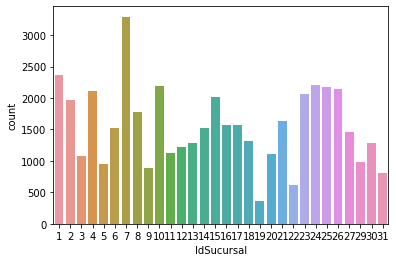

In [109]:
sns.countplot(x='IdSucursal', data=venta)

In [110]:
sucursal[(sucursal['IdSucursal'] == 7)]

,IdSucursal,Sucursal,Domicilio,Localidad,Provincia,Latitud,Longitud
6,7,Flores,Av. Rivadavia 5746,Ciudad De Buenos Aires,Buenos Aires,-34.622868,-58.446449


**Canal con mayor cantidad de ventas**

<AxesSubplot:xlabel='IdCanal', ylabel='count'>

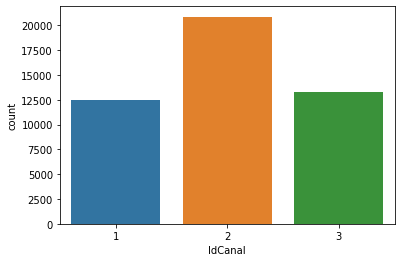

In [111]:
sns.countplot(x='IdCanal', data=venta)

In [112]:
canal[(canal['IdCanal'] == 2)]

,IdCanal,TipoCanal
1,2,Online


# **Sugerencia para la apertura de una nueva sucursal**

En esta seccion vamos a indentificar una posible localidad para abrir una nueva sucursal segun los datos disponibles.

Esta sugerencia sera en base a la localidad con mayor cantidad de clientes sin una sucursal.

In [113]:
# Primero obtenemos una lista con todas las localidades que cuentan con una sucursal.
sucursales = sucursal['Localidad'].unique()

# Generamos un lista donde guardaremos las localidades que no cuentan con una sucursal
sin_sucursal = []

# Obteniendo la cantidad de clientes por Localidad, comparamos las localidades y nos quedamos con aquellas que no poseen una sucursal.
for i in cliente['Localidad'].value_counts().index:
    if i not in sucursales:
        sin_sucursal.append(i)

# Luego mostramos en pantalla la localidad que no cuenta con una sucursal y contiene la mayor cantidad de clientes.
print('La localidad con mas clientes sin una sucursal es:',sin_sucursal[0])

La localidad con mas clientes sin una sucursal es: Bandfield
